In [1]:
import time
import numpy as np
import tensorflow as tf
from constants import *

import util_training
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
filenames = ['%s/%s/Sample%04d_%02d.tfrecords' % (TFRecord_DATA_PATH, 'Train', 3, i) for i in range(20)]

In [3]:
test = util_training.input_pipeline(filenames)

sess = tf.Session(config=tf.ConfigProto(device_count={'GPU':0}))
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

coord =tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

data = sess.run([test])

print('# of samples : %d' % len(data))

# of samples : 1


In [4]:
data = sess.run([test])

In [5]:
print (len(data[0]))
rgb, sparse_label, dense_label, clip_label = data[0]

4


In [6]:
print(len(rgb))
print(rgb.shape)
print(sparse_label)
print(dense_label)
print(len(dense_label))
print(clip_label)

40
(40, 8, 112, 112, 3)
SparseTensorValue(indices=array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3]]), values=array([13, 12,  9, 17], dtype=int32), dense_shape=array([1, 4]))
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 17 17 17 17 17 17 17 17 17 17 1

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


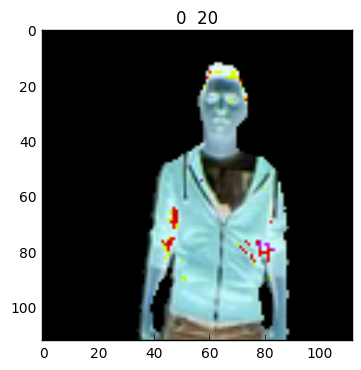

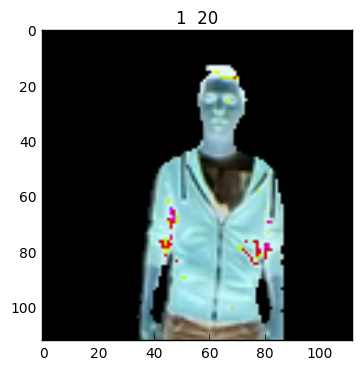

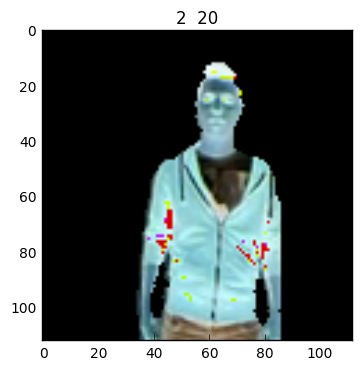

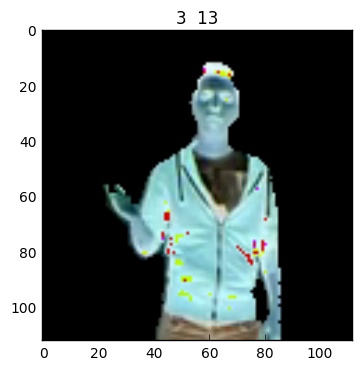

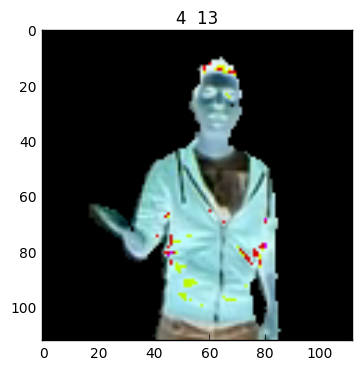

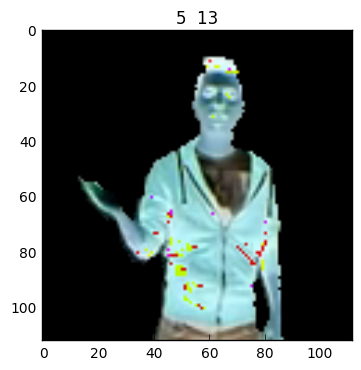

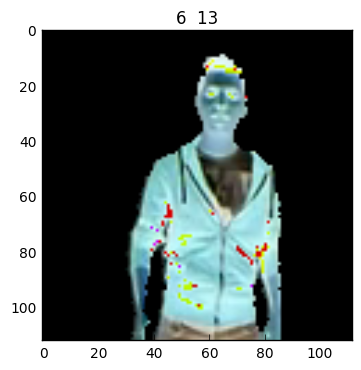

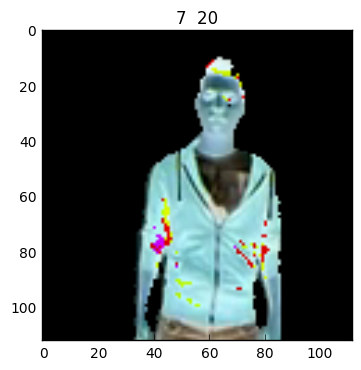

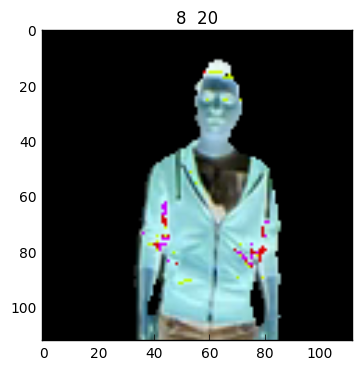

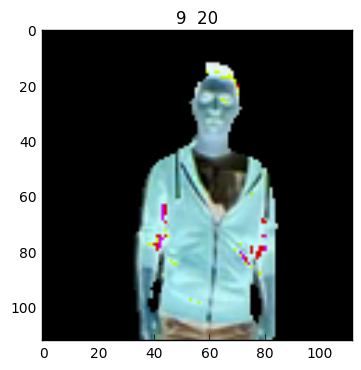

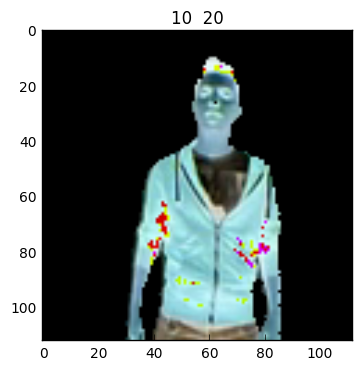

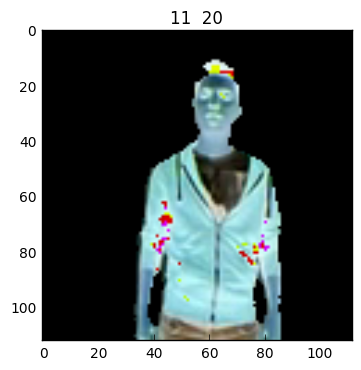

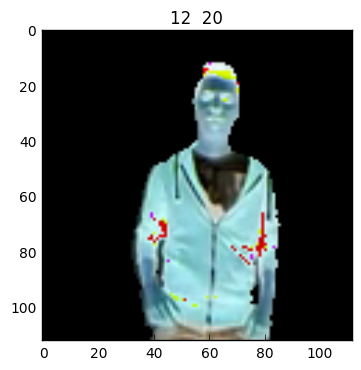

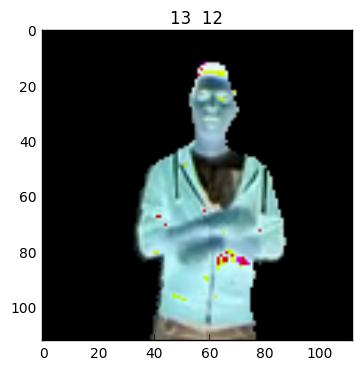

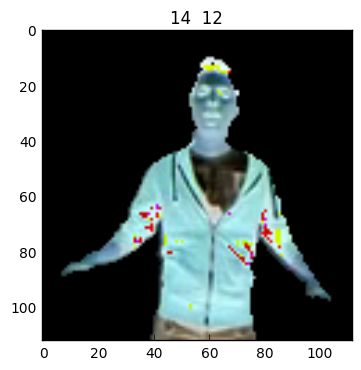

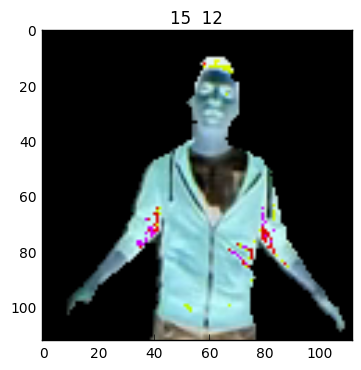

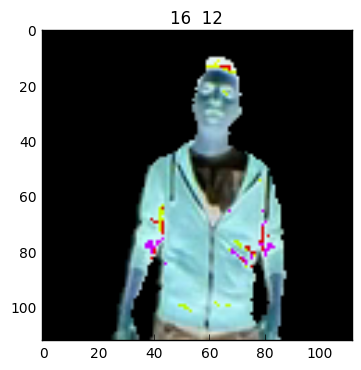

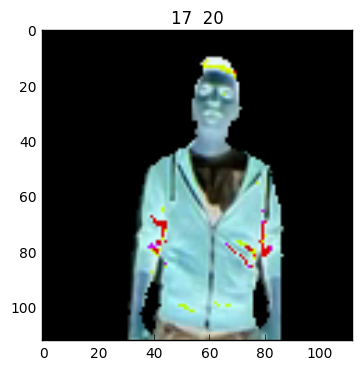

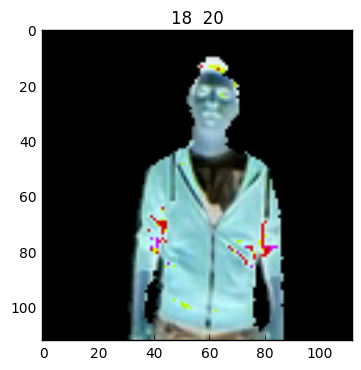

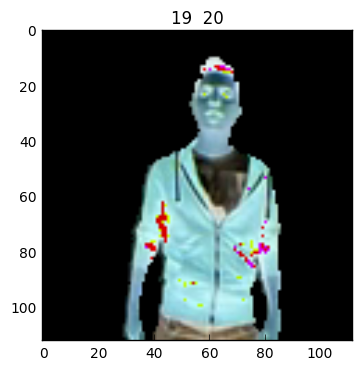

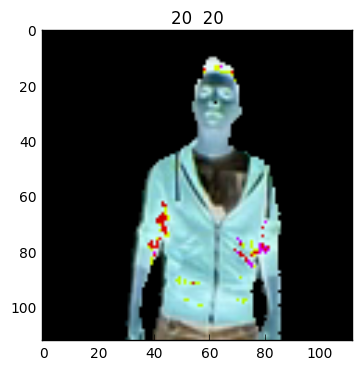

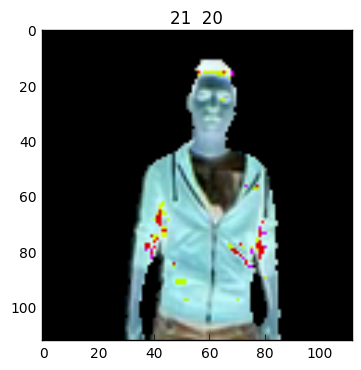

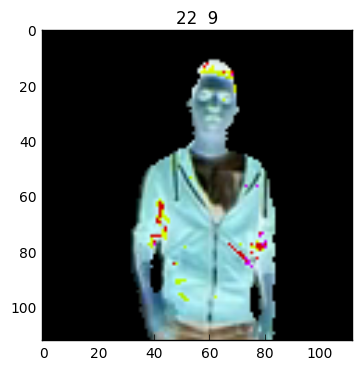

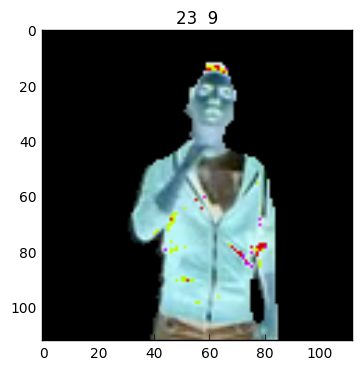

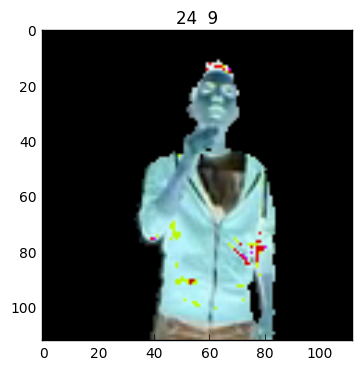

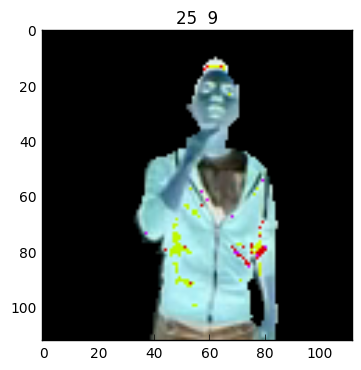

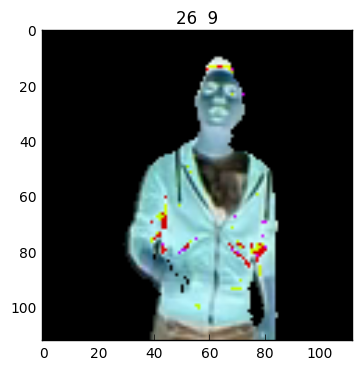

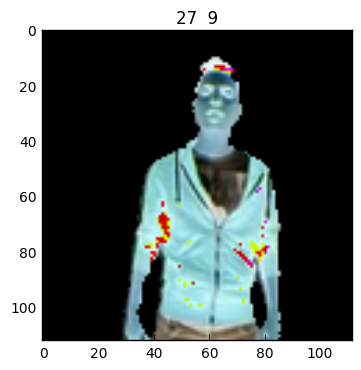

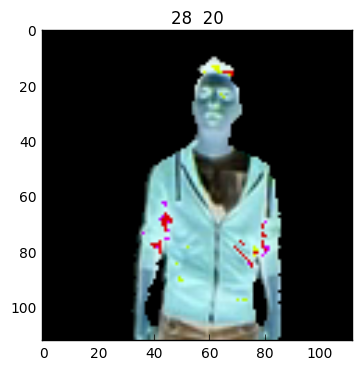

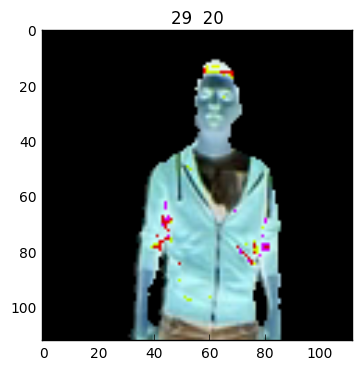

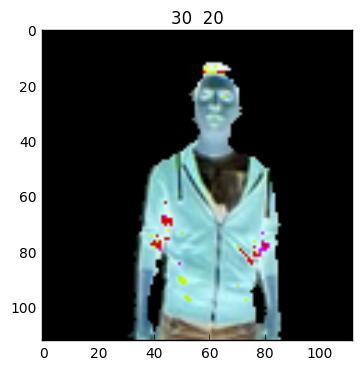

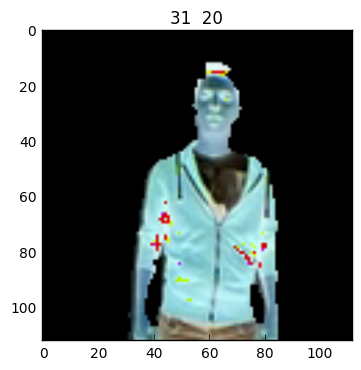

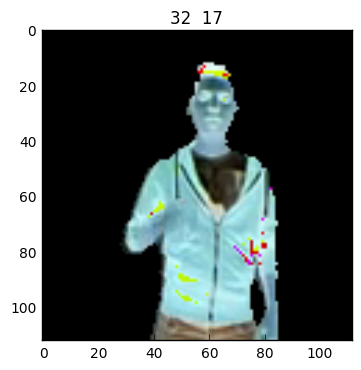

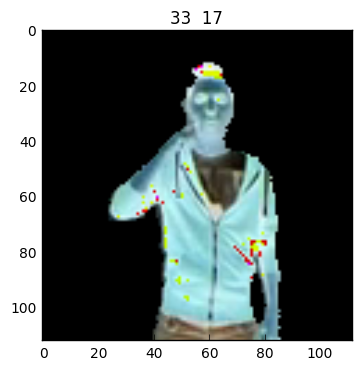

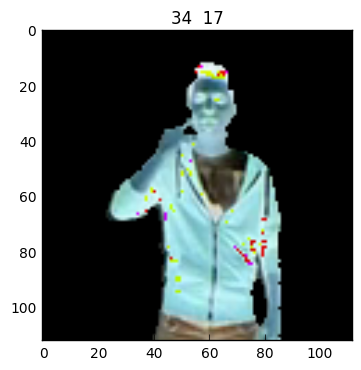

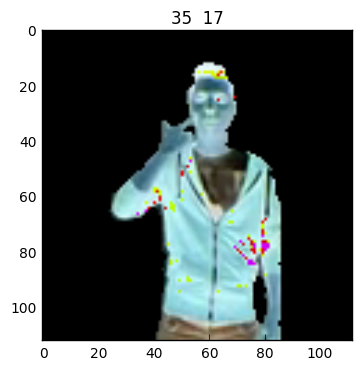

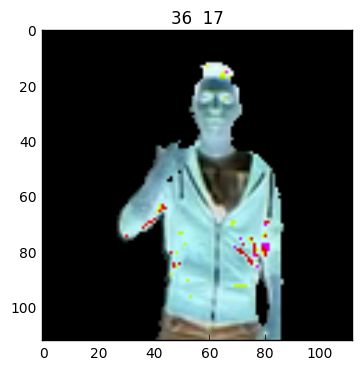

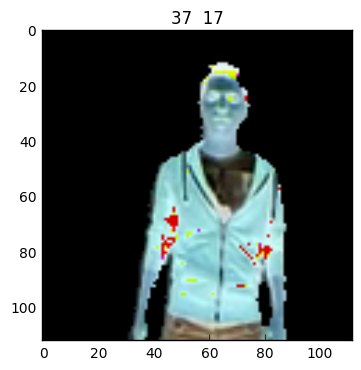

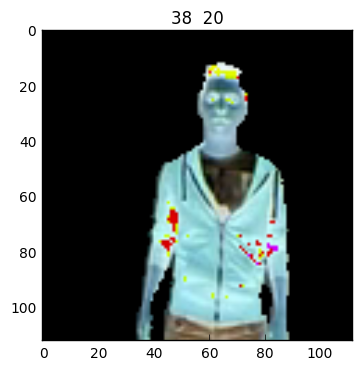

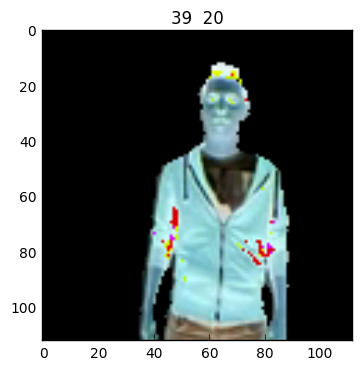

In [7]:
for i in range(0, len(rgb)):
    plt.figure()
    plt.imshow(rgb[i][6])
    plt.title('%d  %d'% (i, clip_label[i]))